# Training Introduction 
* We previously went over the architecture of a neural network, mainly being how to pass data from input to output, and end up with a probabilistic prediction
* The problem was, that all of our weights were random!
* And thus, our predictions were not accurate!

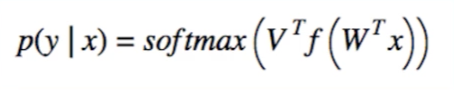

* in this section we are going to focus on how to change our weights so that they are accurate
* Recall, our training data will consist of input and target pairs
* the goal is to make the predictions (y) as close to the targets (t) as possible 
* To do this we will create a **cost function** such that:
    * the **cost is large** when the prediction is not close to the target
    * The **cost is small** when the prediction is close to the target
* we are trying to make our cost as small as possible!
* Recall: the method that we used to achieve this is called gradient descent 
* This is a bit harder with neural networks, because the equations are a bit more complex, but no new skills are required

# Gradient Descent in NNs: Backpropagation
* Gradient descent in neural networks has a special name: **backpropagation**
* backpropagation is recursive in nature: allows us to find the gradient in a systematic way
* This recursiveness allows us to do backpropagation for neural networks that are arbitrarily deep, without much added complexity
* E.g. a 1-hidden layer ANN is no harder than a 100 layer ANN

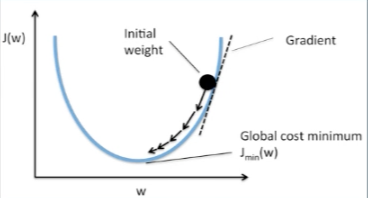

---
# What do all of these symbols and letter mean?
## Training Data
* Training inputs: X
* Training targets: Y
* Generally speaking, these are both matrices
* X is of shape N x D
    * N = number of samples
    * D = number of input features
* Y is of shape N x 1 
    * aka a column vector
    * a 2-d object 
* Alternatively, Y can just be a vector of only 1-D of length N
    * this is how we will represent it in Numpy
    
## Training Data and Predictions
* Inputs: X, Targets: Y, Predictions: p(Y|X)
* p(Y|X) represents a full probability distribution over all individual values in the matrix Y, given the matrix X
* p(Y|X) is therefore also a matrix, same size as Y
* p(y = k | x) is a probability value - a single number 
    * Representing the probability that y is of class k, given the input vector x 
* Note: 
    * Capital letters usually represent matrices
    * lowercase letters usually represent vectors

## p(Y | X) is inconvenient
* p(Y | X) is inconvenient to write 
* many characters
* variable names cannot contain spaces or parentheses
* so we resort to things like:
    * p_y_given_x
    * py_x
    * Py
* none are really ideal
* Old school alternative for predictions is to write:
## $$\hat{y}$$
* notice that this still cannot represent a variable in code...

## Another convention
* This is were things start to get confusing
* an alternative way to represent inputs, targets, and predictions is:
    * Inputs: X
    * Targets: T
    * Predictions: Y
* this is beneficial since we no longer need to write out P of Y given X anywhere
* however this Y now conflicts with our other Y- before Y meant the targets, now it means the predictions

## Using Context
* we will need to use context to determine what Y really is 
* if we see Y and T at the same time, it should be clear that Y is a prediction
* if you see Y being assigned the output a neural network, its a prediction
* but if you see Y and Yhat, Y and p_y_given_x at the same time, Y is a target 

## Weights

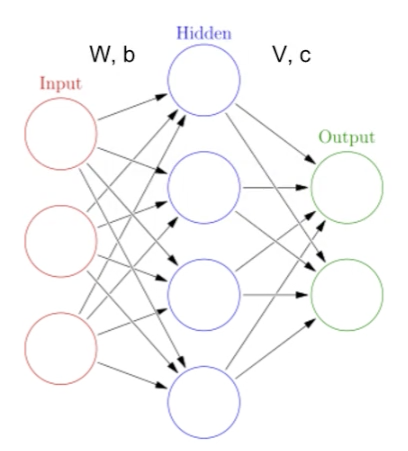

* we have some conventions for the sizes of things
* N is the number of samples we have collected in our experiment
* D is then number of features, which is the size of the input layer in the neural network
* M represents the size of the hidden layer
* K represents the size of the output layer 
* K is the number of output classes, and can be anything from 2 and larger 
* when we have a 1 hidden layer neural network, one way to name the weights is as follows:
    * W is the weight matrix from the input to hidden layer - (D x M)
    * b is the bias term at hidden layer - (M x 1)
    * V is the weight matrix from the hidden to output layer - (M x K)
    * c is the bias term at the output layer - (K x 1)
* you can imagine that if we start adding more hidden layers, we are going to run out of letters! So using V and c isn't really a great option.
* How about just numbering our W's and b's?
    * W1, b1, W2, b2, ... and so on

## Indices
* we may or may not put indices in different places if they represent different things
* Example: if we are looking for the target T for the nth sample and kth class
* In Numpy: T[n,k]
* T(n,k)
* $T^n_k$
* $T_{nk}$
* $t^n_k$
* $t_{nk}$

## Indexing
* i, j, and k are common letters we use for indices
* Ex. i=1...D (input layer)
* Ex. j=1...M (hidden layer)
* Ex. k=1...K (output layer)
* the problem with i, j, and k is what happens if we have more than 1 hidden layer, and eventually run out of letters
* we then pick and index outside of these 3 current letters:
    * q = 1...Q
    * r = 1...R
    * s = 1...S

## Learning Rate
* greek letters: alpha or eta

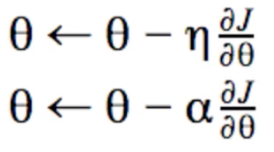

## Cost/Objective/Error Function
* Typical letters: E or J
* Cost or error: usually means something we want to minimize
* Objective: can be something to minimize or maximize 
* Probabilistic interpretation of cost: negative log-likelihood
* we are trying to maximize the log likelihood, or minimizing the negative log likelihood
* minimizing E is the same as maximizing -E
* So if you are minimizing the negative log-likelihood (gradient **descent**) is the same as maximizing the log-likelihood (and likelihood) (gradient **ascent**)

## Likelihood
* Typically we use the uppercase L for likelihood, lowercase l for log-likelihood, if they are both presented together
* If discussing log-likelihood or negative log-likelihood by itself, we might just use L since L is easy to see, and l can be confused for I

---
# What does it mean to train a Neural Network? 
* this is going to be very similar to logistic regression

## The Main Concepts
* we very intuitively define something called the "cost"
* we want to minimize the cost!  
* But how do we minimize the cost? This falls into the domain of calculus! Calculus provides the tools to find the min/max of a function!
* we specifically use a method called **gradient descent**

## How do we define cost? 
* recall that for binary classification, this is exactly how we would calculate the likelihood of a sequence of coin tosses
* So for example, say we flip 2 heads and 3 tails
* Because these are independent trials, the total likelihood is then:
### $$Likelihood = p(H)p(H)p(T)p(T)p(T)$$
* again, the reason we can multiply these probabilities is because each coin toss is independent of the others
* another way to write this is to call:
### $$p = p(H)$$
* and hence we can rewrite likelihood as:
### $$Likelihood = p^{number \; of\; heads}(1-p)^{number \;of \; tails}$$

## Minimize or Maximize?
* the likelihood, or in other words the probability of our model, aka the probability of our data, given our model/parameters, is something we want to maximize
* but recall that we are looking for a cost, in other words, something to minimize
* In order to get something that we can call the cost, we take the negative log of the likelihood and call it the "cost"
* Negative log likelihood = -{#H logp + #T log(1-p)}
* recall from logistic regression that this is called the cross entropy cost function

## Cross-Entropy
* we can phrase it in terms of the output probability of the logistic regression model, and the targets
* $y_n$ = output of logistic regression or neural network
* $t_n$ = actual target (0 or 1) in the binary case 

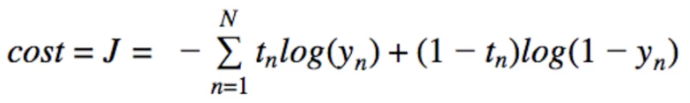

* notice that if we had a neural network doing binary classification, we would use this exact same cost function
* recall that in order to find the best weights to minimize this cost, we can use gradient descent 
* we can also maximize the negative of this, gradient ascent

## Cross Entropy for Multi-class Classification
* in this section we want to be able to handle any number of outputs 
* lets consider a die roll (6 faces, but lets call it K)
* the probability of rolling k = $y_k$
* $t_k$ = 1 if we roll k, 0 if we do not roll k
* we have N total die rolls, so $t_{n,k} =1$ if we rolled k on the nth die roll 
* therefore, only one of the $t_{n,k}$ can equal 1 for any particular n
    * $t_{n,k}$ is thus an indicator matrix or one hot encoded matrix of 1s and 0s
    
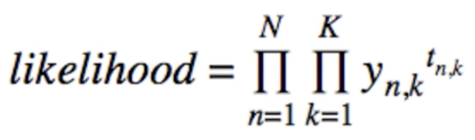

* notice that y and k now have two indexes each:
    * n corresponds to which sample we are looking at 
    * and k corresponds to which class we are looking at 
* notice that for any particular n, only 1 of the k targets can be 1, and the rest must be 0
* that is because if we roll a die and get a 6, then that same die roll can't be any other number 

## Cross Entropy for Multi-class Classification

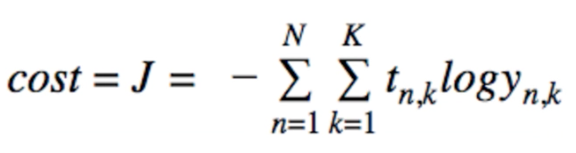

* we again want to transform this into a cost, so we will take the negative log of the likelihood
* this is called the cross entropy cost function, but for multiclass classification
* next we will see how to perform gradient descent on the new cost function and how to write it in code! 